# **Title: A Retail Dataset** 

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [185]:
df = pd.read_csv("C:/Users/USER/Downloads/retail_sales_dataset.csv")

In [186]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [187]:
df.tail(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100
991,992,2023-08-21,CUST992,Female,57,Electronics,2,30,60
992,993,2023-02-06,CUST993,Female,48,Electronics,3,50,150
993,994,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
994,995,2023-04-30,CUST995,Female,41,Clothing,1,30,30
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## Dataset description for Numerical features

In [189]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Dataset description for categorical features

In [190]:
df.describe(include="object")

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST001,Female,Clothing
freq,11,1,510,351


In [223]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [231]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

# Exploratory Data Analysis

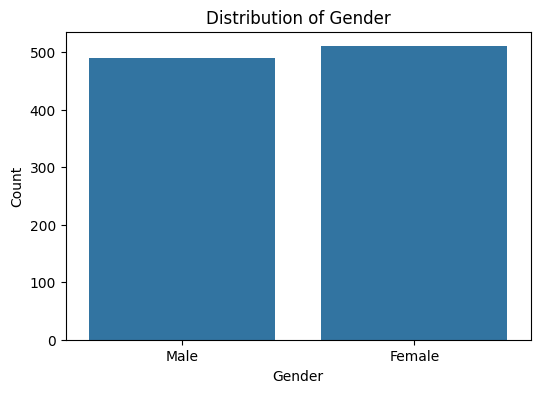

In [232]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show() 


**The female dominates the population**

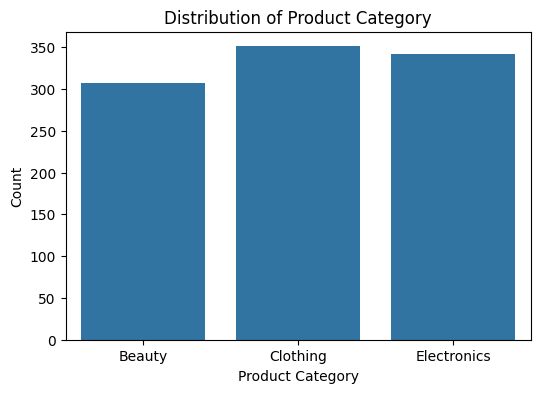

In [219]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Product Category')
plt.title('Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Beauty', 'Clothing', 'Electronics'])
plt.show() 

**Clothing dominates the Product Category, follows by the Electronics, lastly the Beauty**

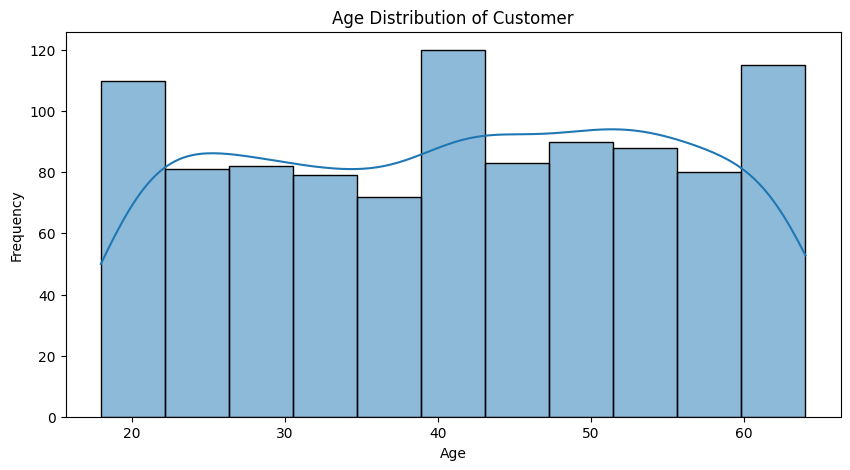

In [193]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution of Customer')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### The age distribution appears approximately uniform to mildly skewed, indicating no strong deviation from normality

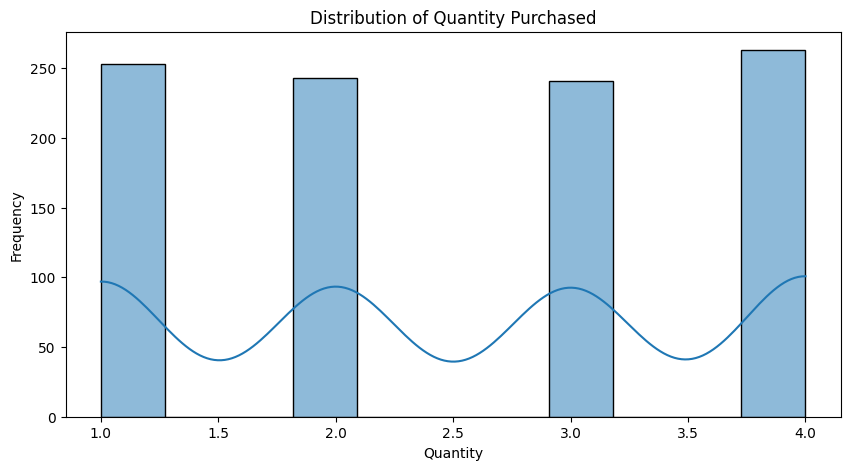

In [194]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Quantity', kde=True)
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

### Quantity reveal a right-skewed distribution, with most purchases involving fewer items.

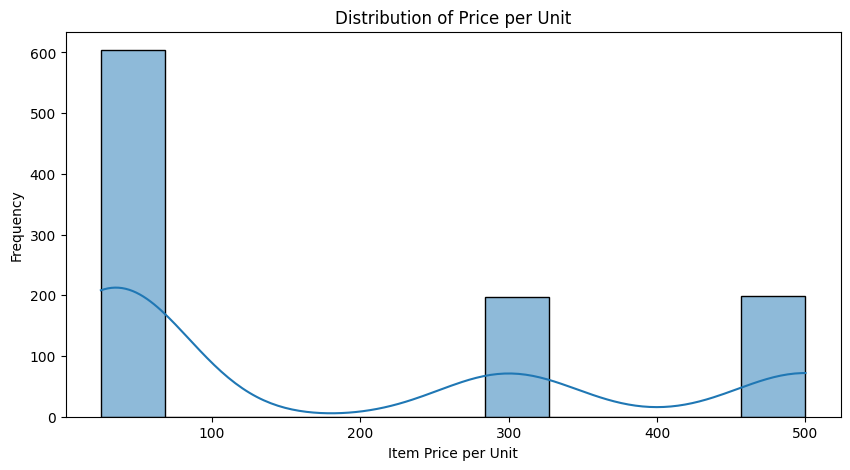

In [195]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Price per Unit', kde=True)
plt.title('Distribution of Price per Unit')
plt.xlabel('Item Price per Unit')
plt.ylabel('Frequency')
plt.show()

### Price per unit exhibits a positively skewed distribution due to a higher frequency of low-priced products.

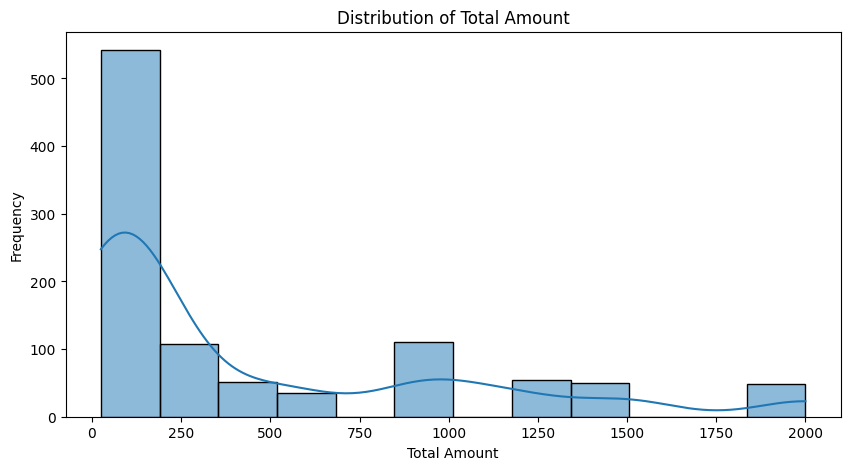

In [196]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Total Amount', kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

### Total Amount is positively skewed, indicating many low-value transactions and fewer high-value purchases.

<Figure size 800x500 with 0 Axes>

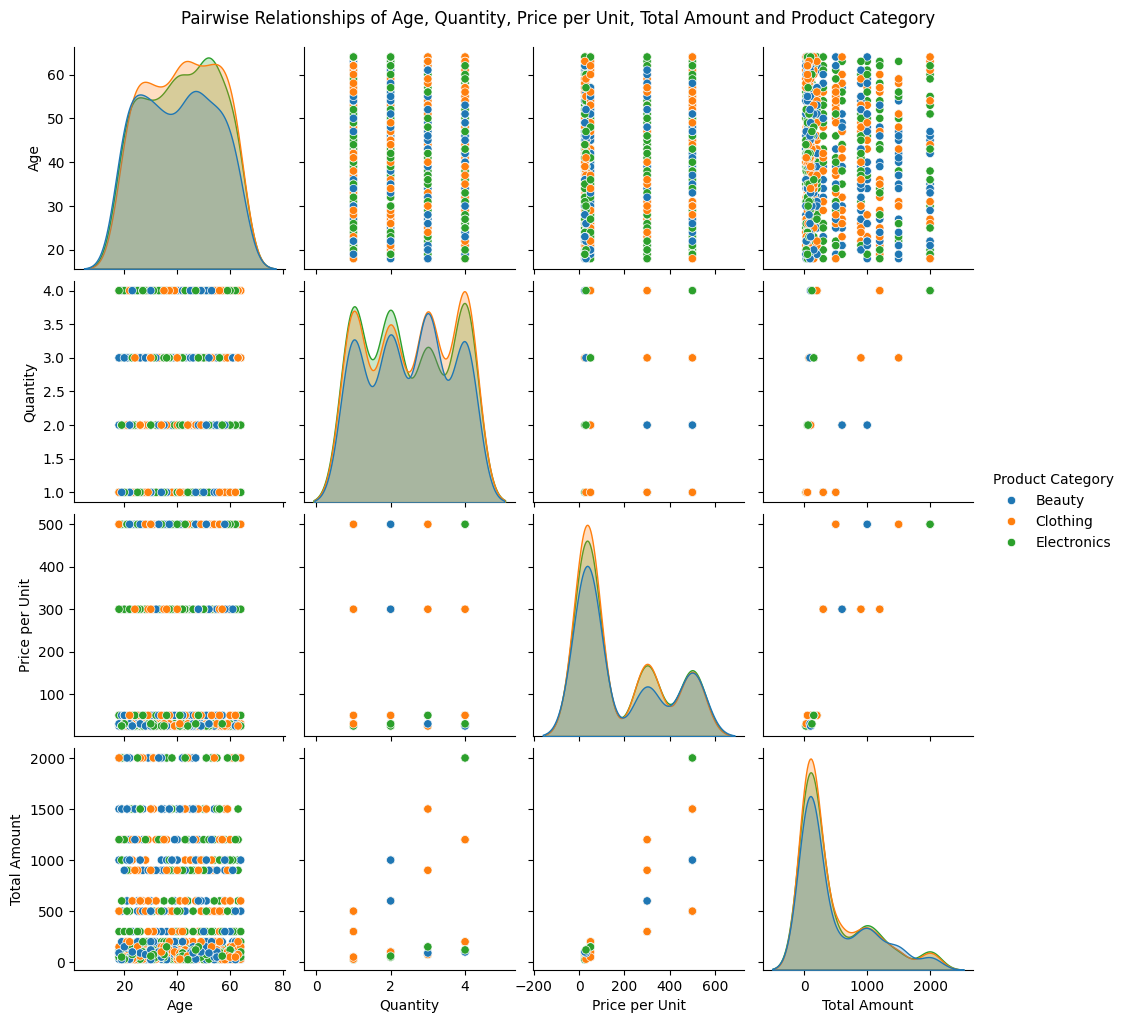

In [237]:
plt.figure(figsize=(8, 5))
sns.pairplot(df[['Age', 'Quantity','Price per Unit','Total Amount','Product Category']], hue='Product Category', diag_kind='kde')
plt.suptitle("Pairwise Relationships of Age, Quantity, Price per Unit, Total Amount and Product Category", y=1.02) # Adjust suptitle position
plt.show()


* # Report
### In this dataset, Quantity, Price per Unit, and Total Amount exhibit positive skewness, while Age shows a more evenly distributed pattern.

## Encoding categorical Variables


**I shall be encoding both Gender and product Category columns, before then; below are what they contain.** 

* They are under Nominal variables, so we shall use **One-Hot Encoding for Gender.**
* **while, I use label encoding** for Product Category(as the target)

In [197]:
print(df['Gender'].value_counts().head(10))

Gender
Female    510
Male      490
Name: count, dtype: int64


In [198]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [199]:
print(df['Product Category'].value_counts().head(10))

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [200]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [201]:
from sklearn.preprocessing import OneHotEncoder
df_one_hot = df.copy()
one_hot_encoder = OneHotEncoder(sparse_output=False)
encode_features = one_hot_encoder.fit_transform(df_encoded[['Gender']])

ohe_df = pd.DataFrame(
    encode_features,
    columns=one_hot_encoder.get_feature_names_out(['Gender'])
)

df_one_hot = pd.concat([df_encoded, ohe_df], axis=1)
df_one_hot.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Product Category_label_encoded,Gender_Female,Gender_Male
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0,0.0,1.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1,1.0,0.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2,0.0,1.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1,0.0,1.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0,0.0,1.0


## Encoding Product Category via Label Encoder

In [202]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoder = LabelEncoder()

df_encoded['Product Category_label_encoded'] = label_encoder.fit_transform(df_encoded['Product Category'])

for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")
    


Beauty: 0
Clothing: 1
Electronics: 2


In [203]:
display(df_encoded[['Product Category', 'Product Category_label_encoded']].sample(10))

,Product Category,Product Category_label_encoded
598,Beauty,0
243,Beauty,0
282,Electronics,2
876,Clothing,1
375,Beauty,0
510,Beauty,0
815,Beauty,0
592,Electronics,2
622,Clothing,1
772,Electronics,2


In [204]:
df_encoded.head() 

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Product Category_label_encoded
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0


## I shall be taken Product Category as the target variable the remaining numeric column as features.

**Before I continue, I will have to concatenate the label column for product category with the df_one_hot.**

In [205]:
Product_label = df_encoded['Product Category_label_encoded']
df_one = pd.concat([df_one_hot, Product_label], axis=0)
df_one.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Product Category_label_encoded,Gender_Female,Gender_Male
0,1.0,2023-11-24,CUST001,Male,34.0,Beauty,3.0,50.0,150.0,0,0.0,1.0
1,2.0,2023-02-27,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0,1,1.0,0.0
2,3.0,2023-01-13,CUST003,Male,50.0,Electronics,1.0,30.0,30.0,2,0.0,1.0
3,4.0,2023-05-21,CUST004,Male,37.0,Clothing,1.0,500.0,500.0,1,0.0,1.0
4,5.0,2023-05-06,CUST005,Male,30.0,Beauty,2.0,50.0,100.0,0,0.0,1.0


In [206]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Transaction ID                  1000 non-null   float64
 1   Date                            1000 non-null   object 
 2   Customer ID                     1000 non-null   object 
 3   Gender                          1000 non-null   object 
 4   Age                             1000 non-null   float64
 5   Product Category                1000 non-null   object 
 6   Quantity                        1000 non-null   float64
 7   Price per Unit                  1000 non-null   float64
 8   Total Amount                    1000 non-null   float64
 9   Product Category_label_encoded  2000 non-null   int64  
 10  Gender_Female                   1000 non-null   float64
 11  Gender_Male                     1000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memor

In [207]:
df_one.describe() Product Category_label_encoded

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Product Category_label_encoded,Gender_Female,Gender_Male
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,2000.000000,1000.00000,1000.00000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,1.035000,0.51000,0.49000
std,288.819436,13.68143,1.132734,189.681356,559.997632,0.805046,0.50015,0.50015
min,1.000000,18.00000,1.000000,25.000000,25.000000,0.000000,0.00000,0.00000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,0.000000,0.00000,0.00000
50%,500.500000,42.00000,3.000000,50.000000,135.000000,1.000000,1.00000,0.00000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,2.000000,1.00000,1.00000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,2.000000,1.00000,1.00000


In [208]:
df_one.shape

(2000, 12)

In [242]:
numeric_df_one = df_one.select_dtypes(include=['number'])
numeric_df_one.cov()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Product Category_label_encoded,Gender_Female,Gender_Male
Transaction ID,83416.666667,257.599600,-8.709710,-3332.852853,-12135.915916,7.537037,-1.500501,1.500501
Age,257.599600,187.181518,-0.367856,-99.711592,-464.046046,0.431712,-0.017938,0.017938
Quantity,-8.709710,-0.367856,1.283087,3.760300,237.053053,-0.010000,0.015876,-0.015876
Price per Unit,-3332.852853,-99.711592,3.760300,35979.016917,90492.402402,-0.591742,0.091191,-0.091191
Total Amount,-12135.915916,-464.046046,237.053053,90492.402402,313597.347347,-2.572573,0.280280,-0.280280
Product Category_label_encoded,7.537037,0.431712,-0.010000,-0.591742,-2.572573,0.648099,-0.013864,0.013864
Gender_Female,-1.500501,-0.017938,0.015876,0.091191,0.280280,-0.013864,0.250150,-0.250150
Gender_Male,1.500501,0.017938,-0.015876,-0.091191,-0.280280,0.013864,-0.250150,0.250150


### There is alot of Negative covariance.

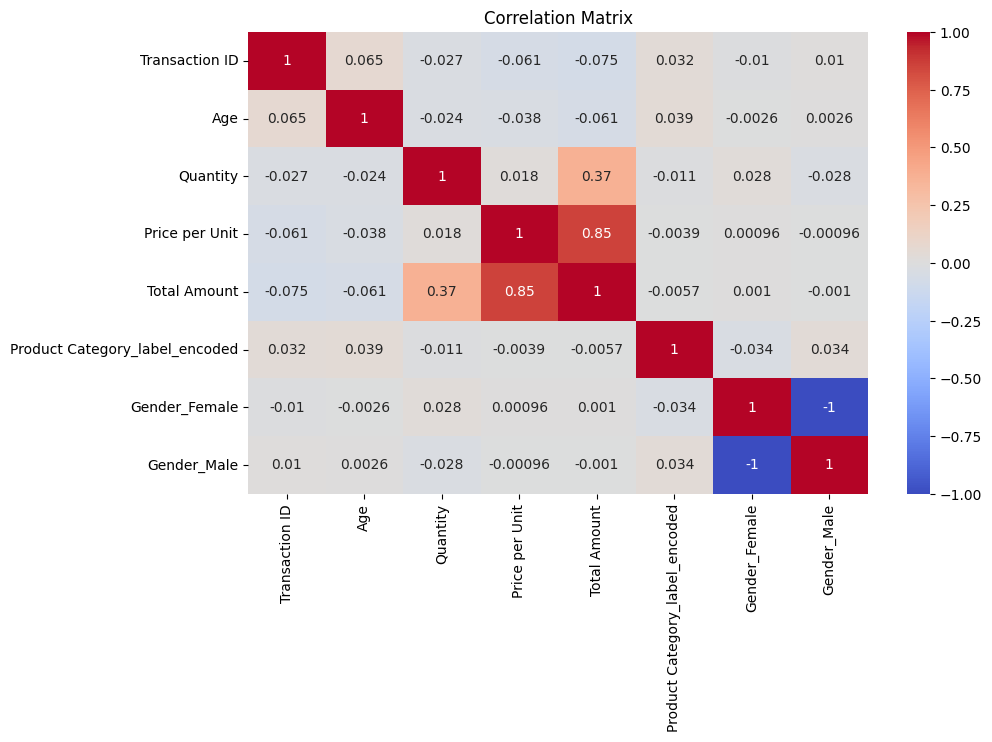

In [241]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

### The Price per Unit has a strong correlation with the Total amount

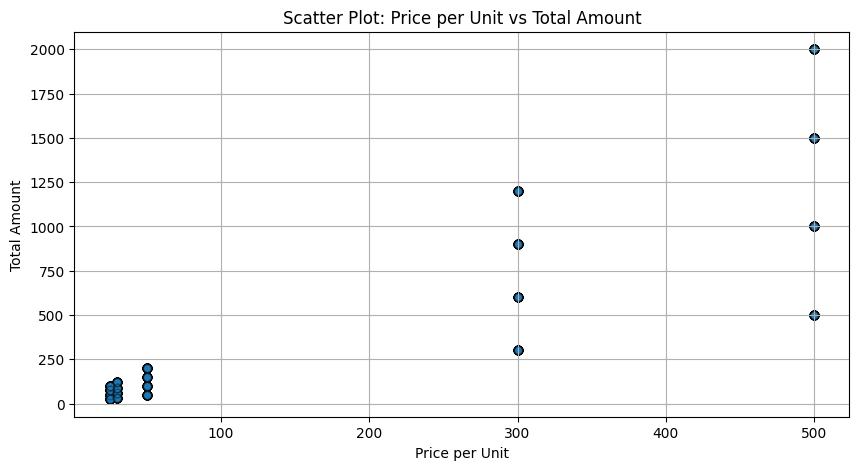

In [243]:
# Create the scatter plot
plt.figure(figsize=(10,5))
plt.scatter(df['Price per Unit'], df['Total Amount'], alpha=0.5, edgecolor='k')
plt.title('Scatter Plot: Price per Unit vs Total Amount')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

## It shows that as the price per unit of items increases, the Total Amount aslo increases.

# **Simple Regression Model**

In [244]:
# Define features (X) and target (y)
X = df[['Price per Unit']]  # Features - note the double brackets to keep it as DataFrame
y = df['Total Amount']  # Target

print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [245]:
model = LinearRegression() 
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [247]:
slope = round(model.coef_[0], 2)
intercept = round(model.intercept_, 2)

print(f"The Slope is: {slope}")
print(f"The Intercept is: {intercept}")

The Slope is: 2.52
The Intercept is: 3.55


In [248]:
y_pred = model.predict(X)

print(y_pred)

[ 129.30796794 1261.12269137   79.00509134 1261.12269137  129.30796794
   79.00509134   66.4293722    66.4293722   758.0939254   129.30796794
  129.30796794   66.4293722  1261.12269137   79.00509134 1261.12269137
 1261.12269137   66.4293722    66.4293722    66.4293722   758.0939254
 1261.12269137  129.30796794   79.00509134  758.0939254   129.30796794
 1261.12269137   66.4293722  1261.12269137   79.00509134  758.0939254
  758.0939254    79.00509134  129.30796794  129.30796794  758.0939254
  758.0939254    66.4293722   129.30796794   79.00509134  129.30796794
   66.4293722   758.0939254   758.0939254    66.4293722    79.00509134
  758.0939254  1261.12269137  758.0939254  1261.12269137   66.4293722
   66.4293722   758.0939254   129.30796794 1261.12269137   79.00509134
  758.0939254    79.00509134  758.0939254   129.30796794  129.30796794
  129.30796794  129.30796794   66.4293722    66.4293722  1261.12269137
   79.00509134  758.0939254   758.0939254    66.4293722   758.0939254
   66.42937

In [250]:
results_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
display(results_df.head(10)) 

,Actual,Predicted
0,150,129.307968
1,1000,1261.122691
2,30,79.005091
3,500,1261.122691
4,100,129.307968
5,30,79.005091
6,50,66.429372
7,100,66.429372
8,600,758.093925
9,200,129.307968


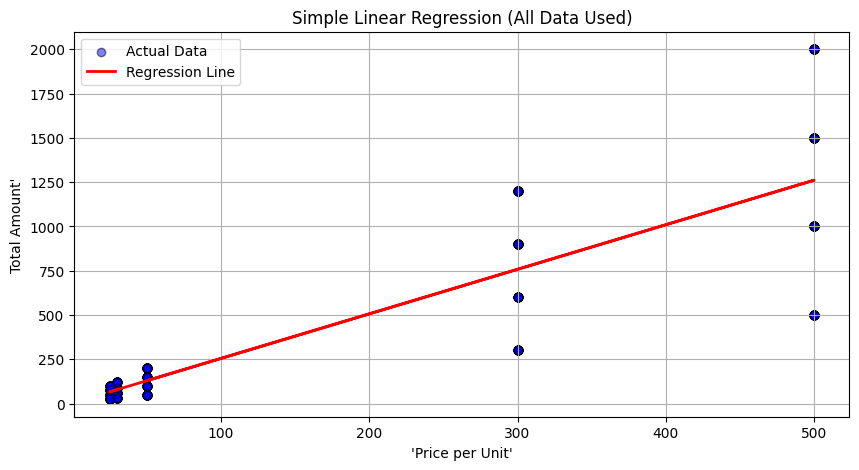

In [252]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.5, edgecolor='k',color='blue', label='Actual Data')

plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("'Price per Unit'")
plt.ylabel("Total Amount'")
plt.title("Simple Linear Regression (All Data Used)")
plt.legend()
plt.grid(True)
plt.show()


# **Multiple Linear Regression**

In [256]:
df_mul = df_one.copy()

df_mul = df_mul.dropna() 

In [257]:
df_mul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Transaction ID                  1000 non-null   float64
 1   Date                            1000 non-null   object 
 2   Customer ID                     1000 non-null   object 
 3   Gender                          1000 non-null   object 
 4   Age                             1000 non-null   float64
 5   Product Category                1000 non-null   object 
 6   Quantity                        1000 non-null   float64
 7   Price per Unit                  1000 non-null   float64
 8   Total Amount                    1000 non-null   float64
 9   Product Category_label_encoded  1000 non-null   int64  
 10  Gender_Female                   1000 non-null   float64
 11  Gender_Male                     1000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memor

In [259]:
# Features (multiple predictors): Features we want to train the model on
X = df_mul[['Age', 'Quantity','Price per Unit',
            'Total Amount', 'Gender_Female','Gender_Male']]

# Target variable
y = df_mul['Product Category_label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
            test_size=0.2, random_state=42)


In [260]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [261]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Intercept
intercept = model.intercept_

display(coefficients)
print(f"Intercept: {intercept}")


,Feature,Coefficient
0,Age,0.001541
1,Quantity,0.005066
2,Price per Unit,-0.000022
3,Total Amount,0.000030
4,Gender_Female,-0.039423
5,Gender_Male,0.039423


Intercept: 0.9651234617703301


In [265]:
y_pred = model.predict(X_train)
print(y_pred)

[1.02098446 1.03360363 1.02782266 0.994133   1.04948195 1.08756963
 1.12529844 0.97066057 1.06124122 1.00183772 1.0003343  1.1076019
 1.04373913 1.02567348 1.06643233 1.1430436  1.09782226 1.08395377
 1.12455228 0.98364413 1.09319943 1.09268021 1.02091827 0.98417078
 1.03630685 1.08688555 1.05721181 1.02919128 1.10123956 0.96687921
 1.10537687 0.99417052 1.01796876 0.99508211 1.02281909 1.06797328
 0.99721488 1.07671684 1.10699257 1.08750344 1.07038083 0.99721488
 1.0363939  1.10297907 0.97682434 1.08133967 1.15074832 1.04663736
 1.07084675 1.11042828 1.09974394 1.02477892 1.10533934 1.03360363
 1.03556553 1.02436004 1.02387704 1.03860927 1.08904439 1.0003343
 1.12721029 1.12429677 1.02243836 0.99220863 0.9823285  1.11007446
 1.10282583 1.01617232 0.98843533 1.03603621 1.05334428 1.03668759
 1.05760762 1.03860927 1.12455228 1.03090455 1.01549512 0.99546285
 1.00008568 0.98691147 1.07434752 1.10398603 0.96846001 1.11825613
 1.08541936 1.03348097 1.09193696 1.02767548 1.02786081 1.067384

In [263]:
results_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_pred
})

display(results_df.head())


,Actual,Predicted
29,0,1.020984
535,0,1.033604
695,1,1.027823
557,1,0.994133
836,0,1.049482


In [266]:
y_pred_test = model.predict(X_test)
print(y_pred_test)

[1.12394295 1.07971168 1.08583013 1.01617232 1.02333776 0.97063542
 1.09782226 0.96075529 1.12670146 1.10409614 1.05068976 1.01011081
 1.09206009 1.08226272 1.00390171 1.04815148 1.03874719 0.97700967
 0.97374245 1.01796876 1.10137194 0.99614005 1.01119566 0.99241911
 1.11777917 1.01416526 1.00918416 1.00711597 1.02936361 0.97800701
 1.07452047 1.06839422 1.01807154 1.04082741 0.96177318 1.12240201
 1.11351017 0.96793696 1.0143529  1.06930581 1.0192542  1.03295432
 1.05896491 1.03706833 0.98005341 1.00538571 1.05038842 0.96383718
 1.1244199  1.09822386 0.99432063 1.06711349 0.99816193 0.98954769
 1.00852454 1.12147039 0.97274742 1.05197469 1.10628639 1.08737107
 1.01600395 1.07546752 1.10130575 1.08663693 1.09022764 1.11623823
 1.08911057 1.04572574 1.02695892 0.97255979 0.98417078 1.01549512
 1.10888734 1.05261568 1.09879215 0.99318129 1.10462279 1.07933094
 1.09520816 1.02721442 1.04255767 1.04878763 0.98073062 1.05038842
 1.06113517 1.01473364 0.99970494 1.01309043 1.01463137 1.0766

In [267]:
results_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

display(results_test.head(20))

,Actual,Predicted
521,0,1.123943
737,1,1.079712
740,1,1.085830
660,1,1.016172
411,2,1.023338
678,0,0.970635
626,1,1.097822
513,2,0.960755
859,1,1.126701
136,0,1.104096


## The Predictions are close to the actual value.

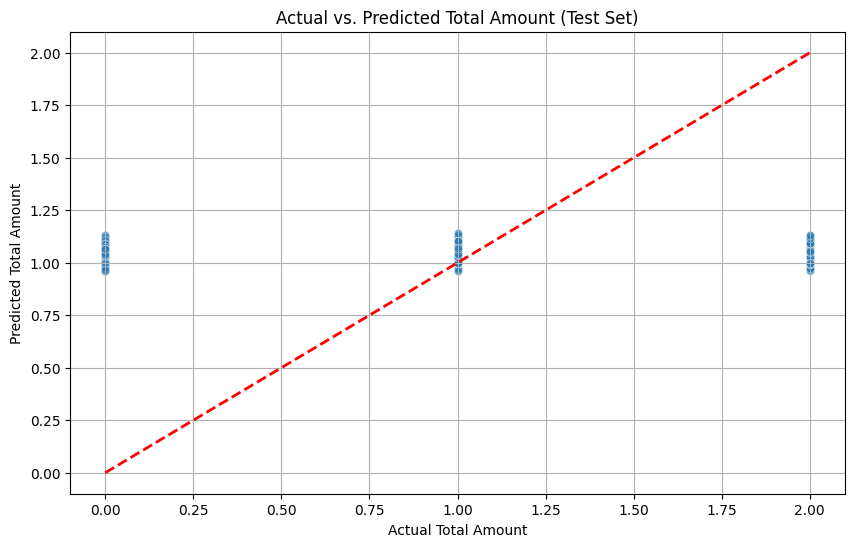

In [268]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.title('Actual vs. Predicted Total Amount (Test Set)')
plt.grid(True)
plt.show()

## The Predictions are slightly different from the actual values due to extremies/outliers

### Evaluation metrics
* 1. MAE
  2. MAE%
  3. R-Square



In [273]:
from sklearn.metrics import mean_absolute_error

# Calculate metrics
MAE = mean_absolute_error(y_test, y_pred_test)

# Round the results
MAE = round(MAE, 2)

# Print results
print(f"The Mean Absolute Error is {MAE}")

The Mean Absolute Error is 0.72


In [275]:
average_Total_Amount = df_mul['Total Amount'].mean()
MAE_percentage_of_avg = (MAE / average_Total_Amount) * 100

print(f"% of Total Amount is {round(MAE_percentage_of_avg, 2)}")

% of Total Amount is 0.16


**The % of Total Amount is below 20%, so it means the model predict Total Amount within 25% of the actual Total Amount.**

In [276]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_pred)

r2_test = r2_score(y_test, y_pred_test)

print(f"The r2_score for train set is {round(r2_train, 2)}")
print(f"The r2_score for test set is {round(r2_test, 2)}")

The r2_score for train set is 0.0
The r2_score for test set is -0.01


* **Report: The model fails to explain a larger proportion of the variance.**
* **It has very low or no linear relationship**

* ## Decision Tree Regression Model

In [277]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [278]:
# Features and target
X = df_one[['Age', 'Quantity','Price per Unit','Total Amount', 'Gender_Female','Gender_Male']]

y = df_one['Product Category_label_encoded']
#for your target, you can call df.drop

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (2000, 6)
Shape of y: (2000,)


In [279]:
model = Pipeline([
    ('model', DecisionTreeRegressor(
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=42,
    ))
])

model.fit(X_train, y_train)

,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None


In [280]:
y_pred_train = model.predict(X_train)
print(y_pred_train)

[1.02857143 1.22222222 1.03337041 ... 1.02857143 1.03337041 1.03337041]


In [281]:
results_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})
display(results_df.head(10))

,Actual,Predicted
968,1,1.028571
240,2,1.222222
819,2,1.033370
692,0,1.028571
420,1,1.300000
85,0,1.033370
998,2,1.033370
365,1,1.176471
22,1,1.033370
240,2,1.033370


In [282]:
y_pred_test = model.predict(X_test)
print(y_pred_test)

[1.03337041 1.03337041 1.03337041 1.08333333 1.03337041 1.03337041
 1.03337041 1.03337041 0.41666667 1.03337041 0.85714286 1.03337041
 1.03337041 1.5        1.11111111 0.68421053 1.1        0.68421053
 1.03337041 1.03337041 0.41666667 1.03337041 1.03337041 1.03337041
 1.03337041 1.35       1.03337041 0.61538462 1.57894737 1.02857143
 1.06666667 1.11111111 1.2        0.92857143 1.03337041 0.41666667
 1.03337041 1.03337041 1.03337041 1.57894737 1.17647059 1.03337041
 1.03337041 1.57894737 1.03337041 0.82352941 1.03337041 0.8
 1.17647059 1.03337041 1.03337041 0.76315789 1.03337041 0.76315789
 0.68421053 1.03337041 1.03337041 1.03337041 1.03337041 1.57894737
 1.03337041 0.8        1.03337041 1.03337041 1.03337041 1.03337041
 0.85714286 1.03337041 1.3        1.03337041 1.03337041 1.03337041
 1.03337041 1.03337041 0.63636364 0.5        1.03337041 1.03337041
 1.22222222 1.03337041 1.3        1.22222222 1.03337041 1.03337041
 1.03337041 1.03337041 1.03337041 0.92857143 1.63636364 1.03337041
 1

In [283]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
display(results_df.head(10))

,Actual,Predicted
860,1,1.033370
353,0,1.033370
333,2,1.033370
905,1,1.083333
289,0,1.033370
273,1,1.033370
938,2,1.033370
731,2,1.033370
65,2,0.416667
323,2,1.033370


* ## Evaluation Metrics

In [284]:
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("Training R² Score:", round(train_r2, 4))
print("Test R² Score:", round(test_r2, 4))

print("Training MAE:", round(train_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training R² Score: 0.0651
Test R² Score: -0.1173
Training MAE: 0.65
Test MAE: 0.73


## Inputing a new range of hyperparameter

# **Hyperparameter Tuning**

In [285]:
from sklearn.model_selection import GridSearchCV
# Is one of the method for Grip search, put in dictionary.
param_grid = {
    'model__max_depth': [5, 10, 15, 20],
    'model__min_samples_split': [5, 10, 20, 25],
    'model__min_samples_leaf': [5, 10, 20, 25]
}


In [286]:
from sklearn.model_selection import GridSearchCV
#parameter_ Drid param_grid,cross validation CV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

In [287]:
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [5, 10, ...], 'model__min_samples_leaf': [5, 10, ...], 'model__min_samples_split': [5, 10, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [288]:
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'model__max_depth': 5, 'model__min_samples_leaf': 25, 'model__min_samples_split': 5}


In [289]:
print("Best CV score:", grid_search.best_score_)

Best CV score: -0.03956921316082855


In [290]:
X = df_one[['Age', 'Quantity','Price per Unit','Total Amount', 'Gender_Female','Gender_Male']]

y = df_one['Product Category_label_encoded']
#for your target, you can call df.drop

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (2000, 6)
Shape of y: (2000,)


In [292]:
model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('model', DecisionTreeRegressor(
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=25,
        random_state=42,
    ))
])

model.fit(X_train, y_train)

,steps,"[('imputer', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,criterion,'squared_error'


In [293]:
y_pred_train = model.predict(X_train)
print(y_pred_train)

[1.01750199 1.01750199 1.01750199 ... 1.01750199 1.01750199 1.01750199]


In [294]:
results_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})
display(results_df.head(10))

,Actual,Predicted
968,1,1.017502
240,2,1.017502
819,2,1.017502
692,0,1.017502
420,1,1.017502
85,0,1.017502
998,2,1.017502
365,1,1.017502
22,1,1.017502
240,2,1.017502


In [295]:
y_pred_test = model.predict(X_test)
print(y_pred_test)

[1.01750199 1.01750199 1.01750199 1.20512821 1.01750199 1.01750199
 1.20512821 1.01750199 1.20512821 1.01750199 1.2        1.01750199
 1.01750199 0.89473684 1.20512821 1.01750199 1.20512821 1.01750199
 1.01750199 1.01750199 1.14285714 1.01750199 1.01750199 1.01750199
 1.01750199 1.20512821 1.01750199 1.01750199 0.86666667 1.01750199
 1.14285714 0.89473684 1.14285714 1.01750199 1.01750199 1.20512821
 1.01750199 1.01750199 1.01750199 1.20512821 1.01750199 1.01750199
 0.86666667 1.20512821 1.01750199 0.89473684 1.01750199 1.14285714
 1.01750199 1.01750199 1.01750199 1.01750199 1.01750199 1.01750199
 1.01750199 1.01750199 1.01750199 1.01750199 1.01750199 0.89473684
 1.01750199 1.01750199 1.01750199 1.01750199 1.01750199 1.01750199
 1.2        1.01750199 1.01750199 1.01750199 1.01750199 0.86666667
 1.01750199 1.01750199 1.01750199 1.14285714 1.01750199 1.01750199
 1.01750199 1.01750199 1.20512821 1.01750199 1.01750199 1.01750199
 1.01750199 1.01750199 1.01750199 1.01750199 1.2        1.0175

In [296]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
display(results_df.head(10))

,Actual,Predicted
860,1,1.017502
353,0,1.017502
333,2,1.017502
905,1,1.205128
289,0,1.017502
273,1,1.017502
938,2,1.205128
731,2,1.017502
65,2,1.205128
323,2,1.017502


* ## Evaluation Metrics

In [297]:
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("Training R² Score:", round(train_r2, 4))
print("Test R² Score:", round(test_r2, 4))

print("Training MAE:", round(train_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training R² Score: 0.0085
Test R² Score: -0.0117
Training MAE: 0.66
Test MAE: 0.68


#### **There is reduction in *mean_absolute_error* when the we choose the hyperparameter that the model selected.**